In [1]:
import pandas
import matplotlib
import matplotlib.style
matplotlib.style.use('ggplot')
%matplotlib inline

tab = pandas.read_csv('data/survey_results_public.csv')
czsk = tab[(tab['Country'] == 'Czech Republic') | (tab['Country'] == 'Slovak Republic')]

In [2]:
print('Kolik lidí celkem vyplnilo dotazník?')
len(tab)

Kolik lidí celkem vyplnilo dotazník?


51392

In [3]:
print('Kolik z nich bylo z ČR/SR?')
len(tab[(tab['Country'] == 'Czech Republic') | (tab['Country'] == 'Slovak Republic')])

Kolik z nich bylo z ČR/SR?


581

In [4]:
salaryczsk = czsk[czsk['Salary'].notnull()]
print('Jaká je, podle dotazníku, průměrná mzda programátorů v ČR/SR? ($/rok)')
salaryczsk['Salary'].mean()

Jaká je, podle dotazníku, průměrná mzda programátorů v ČR/SR? ($/rok)


21211.712109970078

In [5]:
salaryall = tab[tab['Salary'].notnull()]
print('Ve světě? ($/rok)')
salaryall['Salary'].mean()

Ve světě? ($/rok)


56298.480640629248

In [6]:
have = czsk[czsk['HaveWorkedLanguage'].notnull()]
have2 = have[have['HaveWorkedLanguage'].str.contains('Python')]
print('Kolik lidí z ČR/SR uvedlo, že používá Python?')
len(have2[['HaveWorkedLanguage']])

Kolik lidí z ČR/SR uvedlo, že používá Python?


129

In [7]:
want = czsk[czsk['WantWorkLanguage'].notnull()]
want2 = want[want['HaveWorkedLanguage'].notnull()]
want3 = want2[want2['WantWorkLanguage'].str.contains('Python')]
want4 = want3[want3['HaveWorkedLanguage'].str.contains('Python')]
print('Kolik z nich chce v používání Pythonu pokračovat?')
len(want4)

Kolik z nich chce v používání Pythonu pokračovat?


86

In [8]:
want = czsk[czsk['WantWorkLanguage'].notnull()]
want2 = want[want['HaveWorkedLanguage'].notnull()]
want3 = want2[want2['WantWorkLanguage'].str.contains('Python')]
want4 = want3[~want3['HaveWorkedLanguage'].str.contains('Python')]
print('Kolik lidí Python nepoužívá, ale chce ho začít používat?')
len(want4)

Kolik lidí Python nepoužívá, ale chce ho začít používat?


47

In [9]:
have = czsk[czsk['HaveWorkedLanguage'].notnull()]
have2 = have[have['HaveWorkedLanguage'].str.contains('Java')]
print('Kolik lidí z ČR/SR uvedlo, že používá Javu?')
len(have2[['HaveWorkedLanguage']])

Kolik lidí z ČR/SR uvedlo, že používá Javu?


299

In [10]:
want = czsk[czsk['WantWorkLanguage'].notnull()]
want2 = want[want['HaveWorkedLanguage'].notnull()]
want3 = want2[want2['WantWorkLanguage'].str.contains('Java')]
want4 = want3[want3['HaveWorkedLanguage'].str.contains('Java')]
print('Kolik z nich chce v používání Javy pokračovat?')
len(want4)

Kolik z nich chce v používání Javy pokračovat?


203

In [11]:
want = czsk[czsk['WantWorkLanguage'].notnull()]
want2 = want[want['HaveWorkedLanguage'].notnull()]
want3 = want2[want2['WantWorkLanguage'].str.contains('Java')]
want4 = want3[~want3['HaveWorkedLanguage'].str.contains('Java')]
print('Kolik lidí Javu nepoužívá, ale chce ji začít používat?')
len(want4)

Kolik lidí Javu nepoužívá, ale chce ji začít používat?


23

Vykreslete graf, který pro každý jazyk ukáže průměrnou měsíční mzdu lidí z ČR/SR, kteří tento jazyk používají (podle dat dostupných z dotazníku)


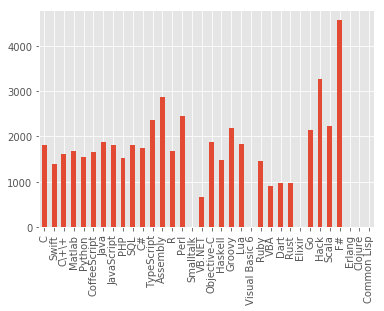

In [12]:
p = czsk[czsk['HaveWorkedLanguage'].notnull()]
a = p['HaveWorkedLanguage']
split = pandas.DataFrame(a.str.split('; ').tolist()).stack().str.replace('+', '\+')
langs = split.unique()
salary = czsk[czsk['Salary'].notnull()]
arr = salary[salary['HaveWorkedLanguage'].notnull()]
list = []
for i in range(0, langs.size):
    vysek = arr[arr['HaveWorkedLanguage'].str.contains(langs[i])]
    list.append(vysek['Salary'].mean() // 12)
vysledek = pandas.Series(list, index=langs)
print('Vykreslete graf, který pro každý jazyk ukáže průměrnou měsíční mzdu lidí z ČR/SR, kteří tento jazyk používají (podle dat dostupných z dotazníku)')
vysledek.fillna(0).plot.bar()